In [1]:
#!python main.py

In [2]:
# import the needed libraries
import pandas as pd
import re                    # For pattern matching and searching
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
#nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
#Creating new dataframe and new features
tweet = pd.read_csv("tweets.csv")
tweet.head()

,Tweet_count,Username,Text,Created At,Retweets,Likes
0,1,Linda,Instead of banning TikTok they should be banni...,Fri Jan 17 00:38:53 +0000 2025,139,1462
1,2,Maririn~,Me seeing Nintendo Switch for $9 on Temu https...,Sat Jan 18 15:13:01 +0000 2025,8,120
2,3,Department of Government Efficiency - TEMU Edi...,Adam Corolla with an EPIC ALL TIME RANT!!\n\n ...,Fri Jan 10 02:28:59 +0000 2025,20,51
3,4,子乾🌏🇮🇹意大利战队🇮🇹,"TikTok, AliExpress, SHEIN &amp; Co surrender E...",Fri Jan 17 20:15:44 +0000 2025,12,14
4,5,TEMU!!,Did anyone do this with Bobette and Ginger yet...,Fri Jan 10 20:21:40 +0000 2025,307,2173


In [4]:
tweet.drop(columns = "Tweet_count", inplace = True)
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Username    1944 non-null   object
 1   Text        1944 non-null   object
 2   Created At  1944 non-null   object
 3   Retweets    1944 non-null   int64 
 4   Likes       1944 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 76.1+ KB


In [5]:
tweet_text = tweet["Text"]

In [6]:
# Function to preprocess tweets
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub(r'RT @\w+: ', " ", sentence)

    # Remove special characters
    sentence = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", " ", sentence)

    # Remove multiple spaces
    sentence = re.sub(r'\s+', " ", sentence)

    return sentence

In [7]:
cleaned_tweets = []

# Process each tweet's text
for tweet_text in tweet["Text"]:
    cleaned_tweet = preprocess_tweet(tweet_text)
    cleaned_tweets.append(cleaned_tweet)

In [8]:
#  Append cleaned tweets to the data frame
tweet["cleaned"] = pd.DataFrame(cleaned_tweets)
tweet.head(5)

,Username,Text,Created At,Retweets,Likes,cleaned
0,Linda,Instead of banning TikTok they should be banni...,Fri Jan 17 00:38:53 +0000 2025,139,1462,instead of banning tiktok they should be banni...
1,Maririn~,Me seeing Nintendo Switch for $9 on Temu https...,Sat Jan 18 15:13:01 +0000 2025,8,120,me seeing nintendo switch for 9 on temu
2,Department of Government Efficiency - TEMU Edi...,Adam Corolla with an EPIC ALL TIME RANT!!\n\n ...,Fri Jan 10 02:28:59 +0000 2025,20,51,adam corolla with an epic all time rant
3,子乾🌏🇮🇹意大利战队🇮🇹,"TikTok, AliExpress, SHEIN &amp; Co surrender E...",Fri Jan 17 20:15:44 +0000 2025,12,14,tiktok aliexpress shein amp co surrender europ...
4,TEMU!!,Did anyone do this with Bobette and Ginger yet...,Fri Jan 10 20:21:40 +0000 2025,307,2173,did anyone do this with bobette and ginger yet...


In [9]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Username    1944 non-null   object
 1   Text        1944 non-null   object
 2   Created At  1944 non-null   object
 3   Retweets    1944 non-null   int64 
 4   Likes       1944 non-null   int64 
 5   cleaned     1944 non-null   object
dtypes: int64(2), object(4)
memory usage: 91.3+ KB


In [10]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate polarity and subjectivity using TextBlob
tweet[['polarity', 'subjectivity']] = tweet['cleaned'].apply(
    lambda text: pd.Series(TextBlob(text).sentiment)
)

# Calculate VADER sentiment scores
vader_scores = tweet['cleaned'].apply(sia.polarity_scores)
# Convert dicts to DataFrame
vader_df = pd.DataFrame(list(vader_scores))
tweet = pd.concat([tweet, vader_df], axis=1)

# Assign sentiment based on compound score
tweet['sentiment'] = tweet['compound'].apply(
    lambda comp: "Positive" if comp >= 0.05 else ("Negative" if comp <= -0.05 else "Neutral")
)

# Display the first 5 rows
tweet.head(5)

,Username,Text,Created At,Retweets,Likes,cleaned,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,Linda,Instead of banning TikTok they should be banni...,Fri Jan 17 00:38:53 +0000 2025,139,1462,instead of banning tiktok they should be banni...,0.0,0.0,0.000,1.000,0.000,0.0000,Neutral
1,Maririn~,Me seeing Nintendo Switch for $9 on Temu https...,Sat Jan 18 15:13:01 +0000 2025,8,120,me seeing nintendo switch for 9 on temu,0.0,0.0,0.000,1.000,0.000,0.0000,Neutral
2,Department of Government Efficiency - TEMU Edi...,Adam Corolla with an EPIC ALL TIME RANT!!\n\n ...,Fri Jan 10 02:28:59 +0000 2025,20,51,adam corolla with an epic all time rant,0.1,0.4,0.255,0.745,0.000,-0.3400,Negative
3,子乾🌏🇮🇹意大利战队🇮🇹,"TikTok, AliExpress, SHEIN &amp; Co surrender E...",Fri Jan 17 20:15:44 +0000 2025,12,14,tiktok aliexpress shein amp co surrender europ...,0.0,0.5,0.104,0.853,0.043,-0.3818,Negative
4,TEMU!!,Did anyone do this with Bobette and Ginger yet...,Fri Jan 10 20:21:40 +0000 2025,307,2173,did anyone do this with bobette and ginger yet...,0.0,0.0,0.000,0.816,0.184,0.4019,Positive


In [11]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [12]:
#Count_values for sentiment
count_values_in_column(tweet,"sentiment")

,Total,Percentage
sentiment,,
Neutral,747,38.43
Positive,729,37.50
Negative,468,24.07


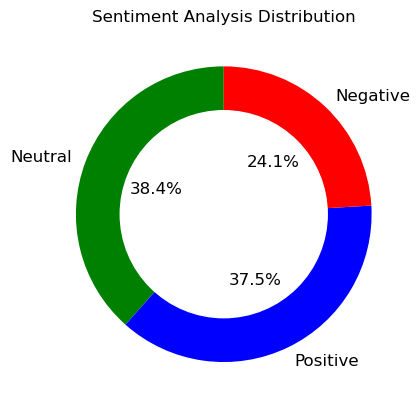

In [13]:
# Create data for Pie Chart
pichart = count_values_in_column(tweet, "sentiment")

names = pichart.index
size = pichart["Percentage"]

# Create a circle for the center of the plot
my_circle = plt.Circle((0, 0), 0.7, color='white')

# Function to format percentage values with white text
def format_autopct(pct):
    return f'{pct:.1f}%'  # Define the percentage format

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    size,
    labels=names,
    colors=['green', 'blue', 'red'],
    autopct=format_autopct,  # Display percentages with the custom format
    startangle=90,           # Start the pie chart at 90 degrees
    textprops={'fontsize': 12},  # Set font size for labels
    pctdistance = 0.49         # Adjust the spacing of the percentage values
)

# Add the circle to create a doughnut shape
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the plot
plt.title("Sentiment Analysis Distribution")  # Optional: Add a title
plt.show()

In [14]:
#Function to Create Wordcloud

def create_wordcloud(text, path):
    mask = np.array(Image.open("./cloudMask.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file(path)
    display(Image.open(path))

Worldcloud for the Whole Tweets


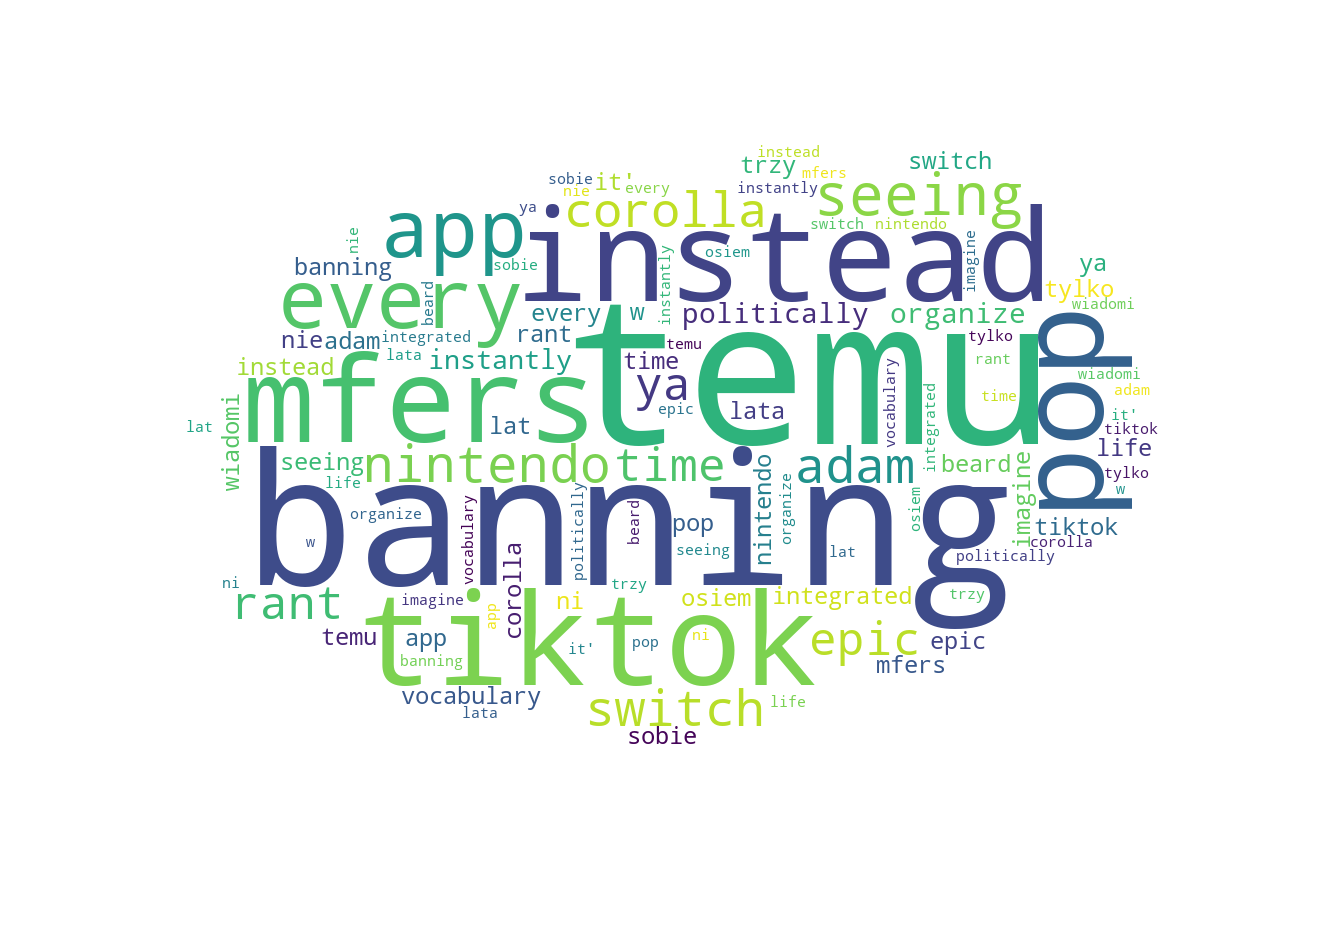

In [15]:
# Creating wordcloud for cleaned tweets

print("Worldcloud for the Whole Tweets")
create_wordcloud(tweet["cleaned"].values, "temu_wordcloud.png")

Worldcloud for the positive Tweets


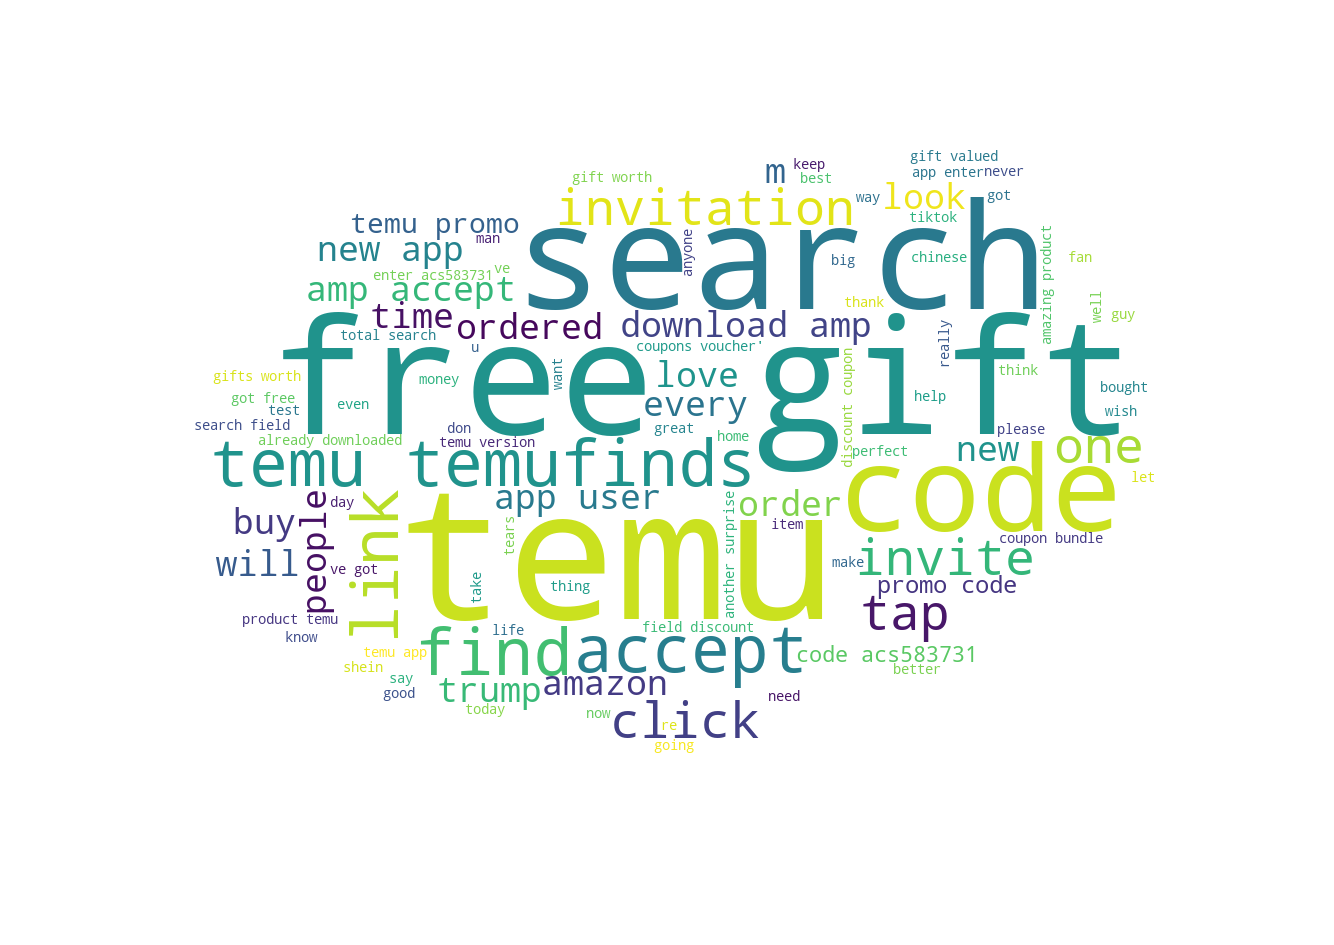

In [16]:
# Mask out the positive tweets
pos_tweet = tweet["sentiment"] == "Positive"

# Creating wordcloud for positive tweets
print("Worldcloud for the positive Tweets")
create_wordcloud(tweet[pos_tweet]["cleaned"].values, "temu_positive_wordcloud.png")

Worldcloud for the negative Tweets


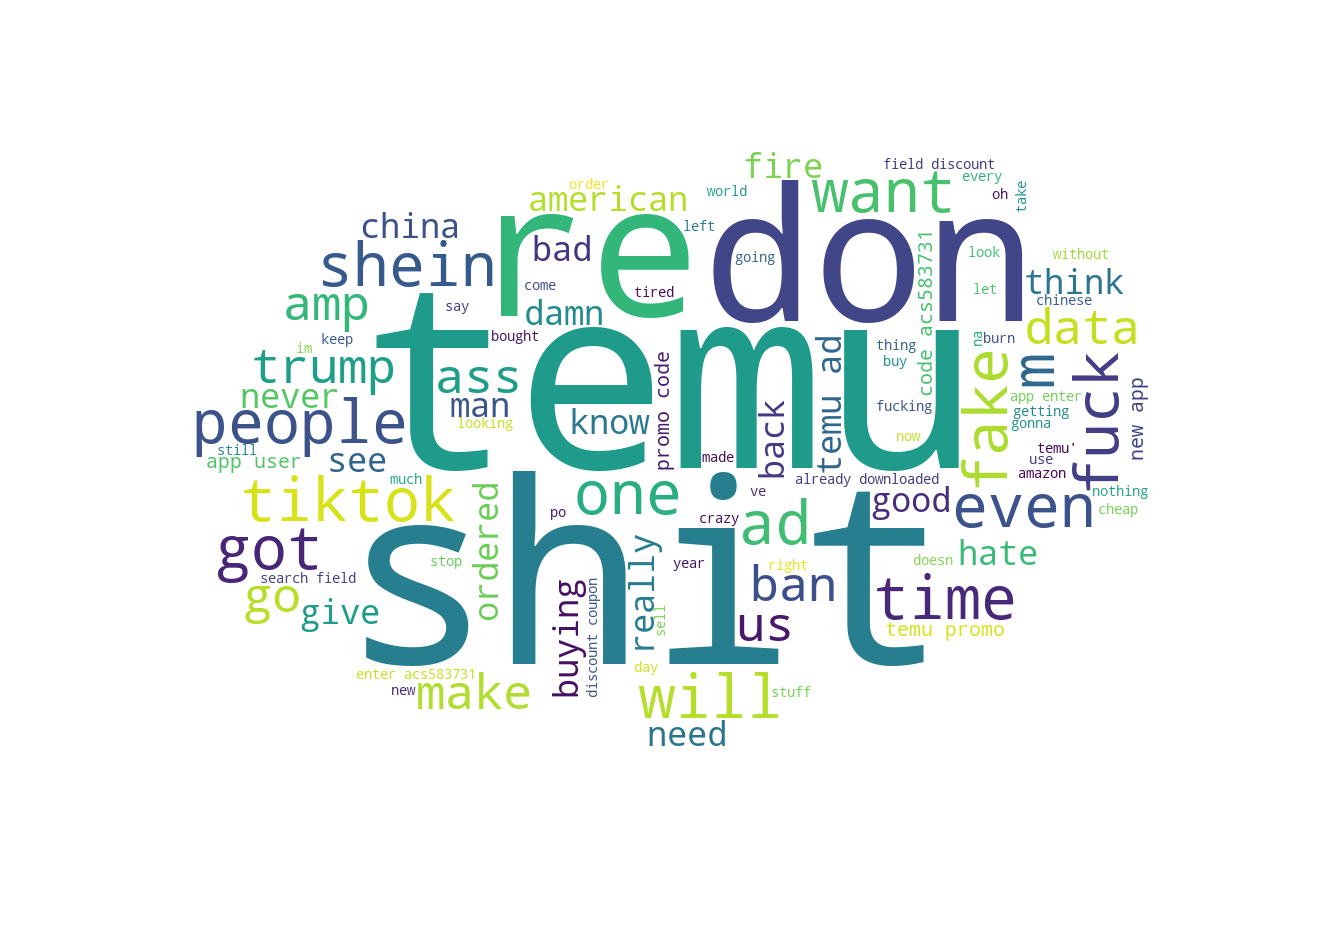

In [17]:
# Mask out the negative tweets
neg_tweet = tweet["sentiment"] == "Negative"

# Creating wordcloud for positive tweets
print("Worldcloud for the negative Tweets")
create_wordcloud(tweet[neg_tweet]["cleaned"].values, "temu_negative_wordcloud.png")

In [18]:
#Calculating tweet's lenght and word count for text insights
tweet['text_len'] = tweet['cleaned'].astype(str).apply(len)
tweet['text_word_count'] = tweet['cleaned'].apply(lambda x: len(str(x).split()))

# View text length
text_len = round(pd.DataFrame(tweet.groupby("sentiment").text_len.mean()),2)
text_len

,text_len
sentiment,
Negative,111.85
Neutral,66.83
Positive,120.35


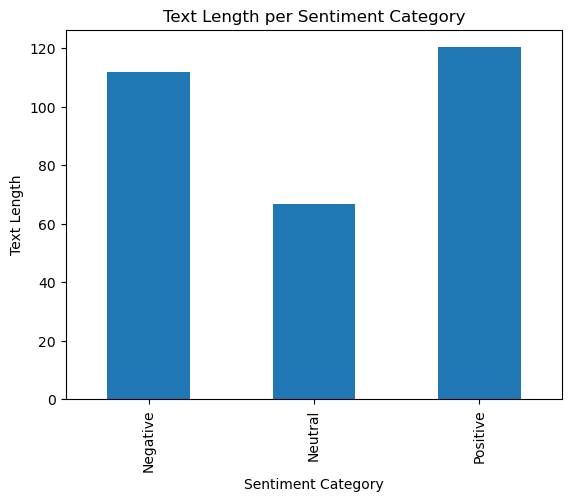

In [19]:
# Visualize text length
text_len.groupby("sentiment")["text_len"].mean().plot(
    kind = "bar",
    xlabel = "Sentiment Category",
    ylabel = "Text Length",
    title = "Text Length per Sentiment Category"
);

In [20]:
# View word count
word_count = round(pd.DataFrame(tweet.groupby("sentiment").text_word_count.mean()),2)
word_count

,text_word_count
sentiment,
Negative,20.62
Neutral,12.32
Positive,22.22


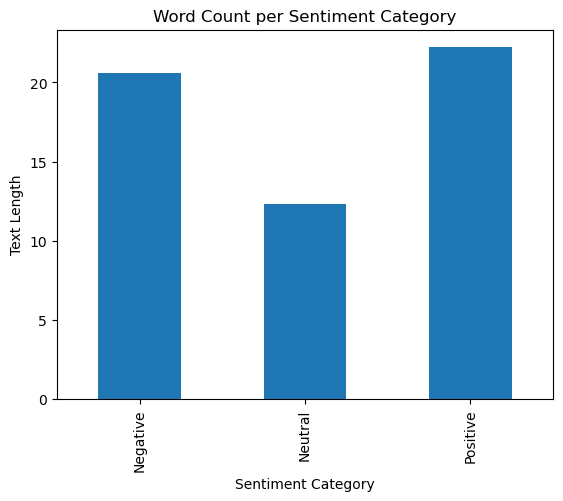

In [21]:
# Visualize word count
word_count.groupby("sentiment")["text_word_count"].mean().plot(
    kind = "bar",
    xlabel = "Sentiment Category",
    ylabel = "Text Length",
    title = "Word Count per Sentiment Category"
);

In [22]:
tweet.to_csv("./temu_sentimentanalysis_output.csv", sep=',', encoding='UTF-8')
tweet.head(5)

,Username,Text,Created At,Retweets,Likes,cleaned,polarity,subjectivity,neg,neu,pos,compound,sentiment,text_len,text_word_count
0,Linda,Instead of banning TikTok they should be banni...,Fri Jan 17 00:38:53 +0000 2025,139,1462,instead of banning tiktok they should be banni...,0.0,0.0,0.000,1.000,0.000,0.0000,Neutral,91,17
1,Maririn~,Me seeing Nintendo Switch for $9 on Temu https...,Sat Jan 18 15:13:01 +0000 2025,8,120,me seeing nintendo switch for 9 on temu,0.0,0.0,0.000,1.000,0.000,0.0000,Neutral,40,8
2,Department of Government Efficiency - TEMU Edi...,Adam Corolla with an EPIC ALL TIME RANT!!\n\n ...,Fri Jan 10 02:28:59 +0000 2025,20,51,adam corolla with an epic all time rant,0.1,0.4,0.255,0.745,0.000,-0.3400,Negative,40,8
3,子乾🌏🇮🇹意大利战队🇮🇹,"TikTok, AliExpress, SHEIN &amp; Co surrender E...",Fri Jan 17 20:15:44 +0000 2025,12,14,tiktok aliexpress shein amp co surrender europ...,0.0,0.5,0.104,0.853,0.043,-0.3818,Negative,250,39
4,TEMU!!,Did anyone do this with Bobette and Ginger yet...,Fri Jan 10 20:21:40 +0000 2025,307,2173,did anyone do this with bobette and ginger yet...,0.0,0.0,0.000,0.816,0.184,0.4019,Positive,97,13
